# Task 4 - Satisfaction Analysis
Assuming that the satisfaction of a user is dependent on user engagement and experience, you’re expected in this section to analyze customer satisfaction in depth. The following tasks will guide you:

Based on the engagement analysis + the experience analysis you conducted above,

Task 4.1 - Write a Python program to assign:

f. engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)

g. experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster.

Task 4.2 - Consider the average of both engagement & experience scores as the satisfaction score & report the top 10 satisfied customer

Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer.

Task 4.4 - Run a k-means (k=2) on the engagement & the experience score.

Task 4.5 - Aggregate the average satisfaction & experience score per cluster.

Task 4.6 - Export your final table containing all user id + engagement, experience & satisfaction scores in your local MySQL database. Report a screenshot of a select query output on the exported table.

Task 4.7 Model deployment tracking- deploy the model and monitor your model. Here you can use Docker or other MlOps tools which can help you to track your model’s change.

Your model tracking report includes code version, start and end time, source, parameters, metrics (loss convergence) and artefacts or any output file regarding each specific run. (CSV file, screenshot)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel('telcom_data.xlsx')

In [3]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,43559.500903,770.0,43580.607998,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,43564.544491,235.0,43580.344306,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,43564.737627,1.0,43580.498762,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,43565.021817,486.0,43580.317072,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,43567.840544,565.0,43580.444815,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,43584.311597,451.0,43585.251771,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,43584.311597,483.0,43585.445521,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,43584.311609,283.0,43585.448750,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,43584.311609,696.0,43585.444838,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  object 
 1   Start                                     150000 non-null  float64
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  float64
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [5]:
data.describe()

,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,43581.525451,499.188200,43582.736204,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,1.711286,288.611834,1.764060,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,43559.500903,0.000000,43579.958310,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,43580.018064,250.000000,43581.312633,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,43581.369034,499.000000,43582.959780,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,43582.763192,749.000000,43584.302170,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,43584.311609,999.000000,43585.999618,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [6]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,43559.500903,770.0,43580.607998,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,43564.544491,235.0,43580.344306,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,43564.737627,1.0,43580.498762,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,43565.021817,486.0,43580.317072,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,43567.840544,565.0,43580.444815,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
data.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149996,7277825670196679680,43584.311597,451.0,43585.251771,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,43584.311597,483.0,43585.445521,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,43584.311609,283.0,43585.448750,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,43584.311609,696.0,43585.444838,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0
150000,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,NaN,NaN


In [8]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


# Task 4.1 - Write a Python program to assign:

f. engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)

g. experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster.

# Engagement analysis

In [9]:
data['Sessions Frequency'] = data.groupby('MSISDN/Number')['Bearer Id'].transform('count')
data['Duration Of Session'] = data['Dur. (ms)']
data['Session Total Traffic']= data['Total UL (Bytes)'] + data['Total DL (Bytes)']

In [10]:
data['Sessions Frequency'] 

0         2.0
1         2.0
2         1.0
3         1.0
4         1.0
         ... 
149996    1.0
149997    2.0
149998    1.0
149999    1.0
150000    NaN
Name: Sessions Frequency, Length: 150001, dtype: float64

In [11]:
data['Duration Of Session']

0         1823652.0
1         1365104.0
2         1361762.0
3         1321509.0
4         1089009.0
            ...    
149996      81230.0
149997      97970.0
149998      98249.0
149999      97910.0
150000          NaN
Name: Duration Of Session, Length: 150001, dtype: float64

In [12]:
data['Session Total Traffic']

0         345629377.0
1         707185356.0
2         307690973.0
3         889352748.0
4         607681403.0
             ...     
149996    631804110.0
149997    705783925.0
149998    627698629.0
149999    401522016.0
150000            NaN
Name: Session Total Traffic, Length: 150001, dtype: float64

In [13]:
data['Sessions Frequency'] 
data['Duration Of Session']
data['Session Total Traffic']

0         345629377.0
1         707185356.0
2         307690973.0
3         889352748.0
4         607681403.0
             ...     
149996    631804110.0
149997    705783925.0
149998    627698629.0
149999    401522016.0
150000            NaN
Name: Session Total Traffic, Length: 150001, dtype: float64

In [14]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Sessions Frequency,Duration Of Session,Session Total Traffic
0,13114483460844900352,43559.500903,770.0,43580.607998,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0,2.0,1823652.0,345629377.0
1,13114483482878900224,43564.544491,235.0,43580.344306,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0,2.0,1365104.0,707185356.0
2,13114483484080500736,43564.737627,1.0,43580.498762,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0,1.0,1361762.0,307690973.0
3,13114483485442799616,43565.021817,486.0,43580.317072,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0,1.0,1321509.0,889352748.0
4,13114483499480700928,43567.840544,565.0,43580.444815,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0,1.0,1089009.0,607681403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,43584.311597,451.0,43585.251771,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0,1.0,81230.0,631804110.0
149997,7349883264234609664,43584.311597,483.0,43585.445521,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0,2.0,97970.0,705783925.0
149998,13114483573367300096,43584.311609,283.0,43585.448750,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0,1.0,98249.0,627698629.0
149999,13114483573367300096,43584.311609,696.0,43585.444838,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0,1.0,97910.0,401522016.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 58 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  object 
 1   Start                                     150000 non-null  float64
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  float64
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [16]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [17]:
# 1.Aggregate the metrics per customer id (MSISDN)
Aggregate_data= data.groupby('MSISDN/Number').agg({'Sessions Frequency':'sum',
                                                  'Duration Of Session':'sum',
                                                  'Session Total Traffic':'sum'})
Aggregate_data

,Sessions Frequency,Duration Of Session,Session Total Traffic
MSISDN/Number,,,
3.360100e+10,1.0,116720.0,8.786906e+08
3.360100e+10,1.0,181230.0,1.568596e+08
3.360100e+10,1.0,134969.0,5.959665e+08
3.360101e+10,1.0,49878.0,4.223207e+08
3.360101e+10,4.0,37104.0,1.457411e+09
...,...,...,...
3.379000e+10,1.0,8810.0,7.146416e+08
3.379000e+10,1.0,140988.0,4.803073e+08
3.197021e+12,1.0,877385.0,2.321240e+08


In [18]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization
from sklearn.cluster import KMeans
kmeans=KMeans()

In [19]:
Aggregate_data['Sessions Frequency']=mms.fit_transform(Aggregate_data[['Sessions Frequency']])
Aggregate_data['Duration Of Session']=mms.fit_transform(Aggregate_data[['Duration Of Session']])
Aggregate_data['Session Total Traffic']=mms.fit_transform(Aggregate_data[['Session Total Traffic']])


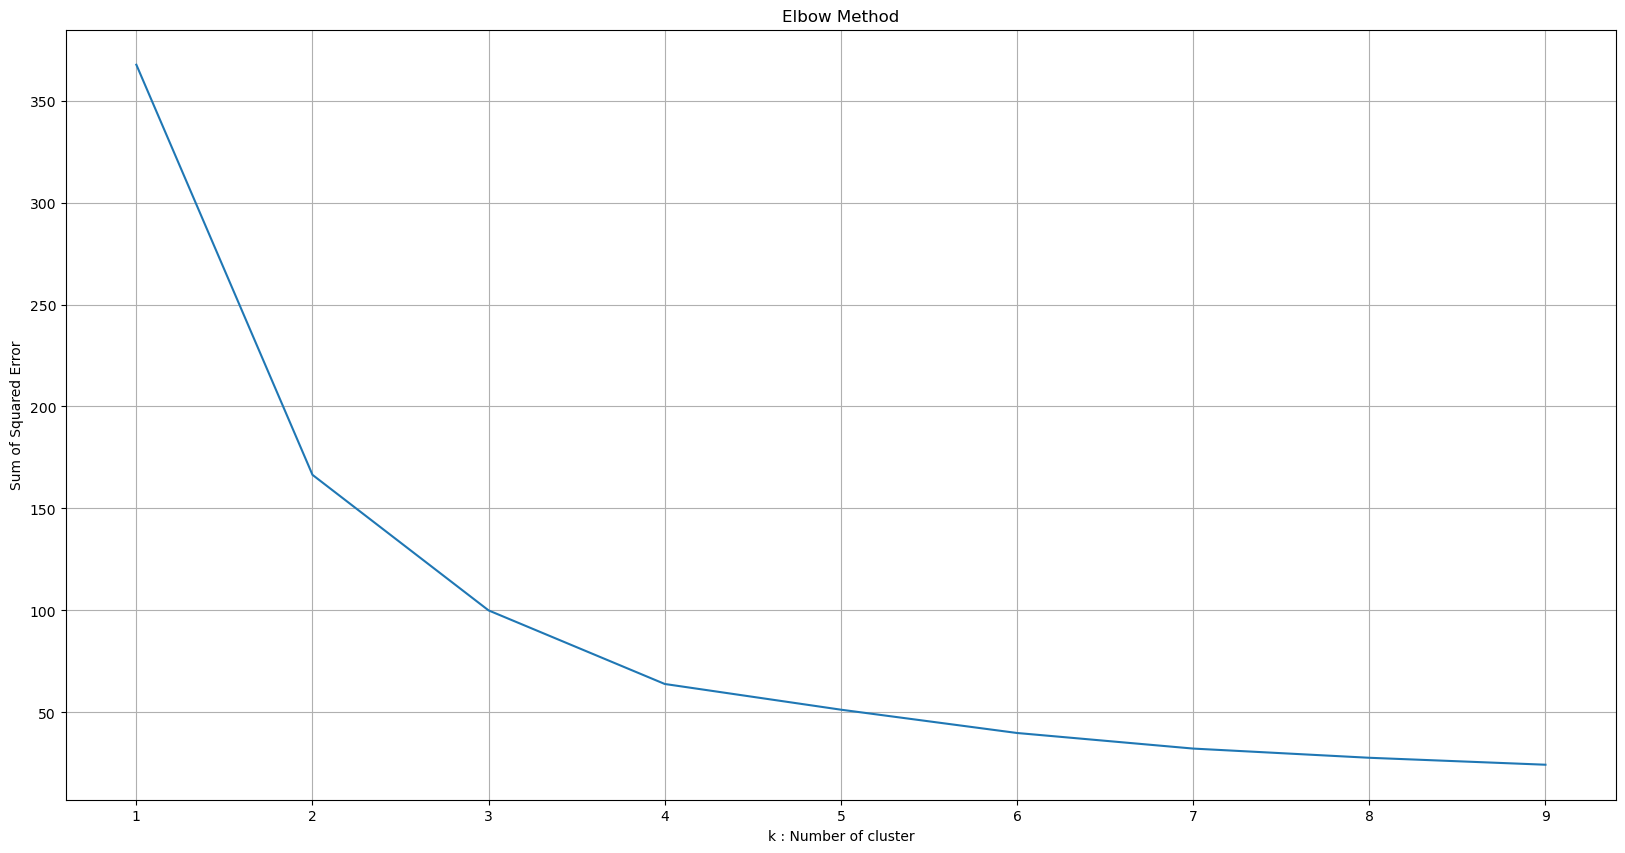

In [20]:
sse = {};
kmax = 10
fig = plt.subplots(figsize = (20,10))

# Elbow Method :
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(Aggregate_data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

In [21]:
#2 Normalize the engagement metrics
Scaler = StandardScaler()
normalized_data = pd.DataFrame(Scaler.fit_transform(Aggregate_data), columns=Aggregate_data.columns, index=Aggregate_data.index)
normalized_data

,Sessions Frequency,Duration Of Session,Session Total Traffic
MSISDN/Number,,,
3.360100e+10,-0.322114,-0.158014,0.382297
3.360100e+10,-0.322114,0.188148,-1.087666
3.360100e+10,-0.322114,-0.060090,-0.193453
3.360101e+10,-0.322114,-0.516690,-0.547071
3.360101e+10,0.284763,-0.585235,1.560825
...,...,...,...
3.379000e+10,-0.322114,-0.737061,0.048222
3.379000e+10,-0.322114,-0.027791,-0.428985
3.197021e+12,-0.322114,3.923731,-0.934395


In [22]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_data)
Aggregate_data['cluster']=kmeans.labels_
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
lowest_engagement = Aggregate_data.groupby('cluster').get_group(0).mean()
lowest_engagement

Sessions Frequency       0.001721
Duration Of Session      0.005789
Session Total Traffic    0.060387
cluster                  0.000000
dtype: float64

In [24]:
def get_engagement_score(data, lowest):
    x = float(lowest['Sessions Frequency'])
    y = float(lowest['Duration Of Session'])
    z = float(lowest['Session Total Traffic'])
    new_data = data.copy()
    new_data['engagement score'] = ((data['Sessions Frequency'] - x)**2 + (data['Duration Of Session'] - y)**2 + (data['Session Total Traffic'] - z)**2)**0.5
    return new_data
engagement_scored_data = get_engagement_score(Aggregate_data, lowest_engagement)
engagement_scored_data.head(15)

,Sessions Frequency,Duration Of Session,Session Total Traffic,cluster,engagement score
MSISDN/Number,,,,,
3.360100e+10,0.000000,0.005908,0.095931,0,0.035587
3.360100e+10,0.000000,0.009387,0.014026,0,0.046532
3.360100e+10,0.000000,0.006892,0.063851,0,0.004022
3.360101e+10,0.000000,0.002304,0.044148,0,0.016698
3.360101e+10,0.009288,0.001615,0.161598,0,0.101580
3.360101e+10,0.009288,0.013309,0.066035,0,0.012071
3.360101e+10,0.009288,0.006536,0.070518,0,0.012667
3.360101e+10,0.000000,0.004273,0.033974,0,0.026512
3.360101e+10,0.009288,0.026342,0.108577,1,0.052933


In [25]:
lowest_experiance = Aggregate_data.groupby('cluster').get_group(0).mean()
lowest_experiance

Sessions Frequency       0.001721
Duration Of Session      0.005789
Session Total Traffic    0.060387
cluster                  0.000000
dtype: float64

In [26]:
def get_experiance_score(data, low):
    x = float(low['Sessions Frequency'])
    y = float(low['Duration Of Session'])
    z = float(low['Session Total Traffic'])
    new_data = data.copy()
    new_data['experience score'] = ((data['Sessions Frequency'] - x)**2 + (data['Duration Of Session'] - y)**2 \
                              + (data['Session Total Traffic'] - z)**2 )**0.5
    return new_data
experiance_scored_data = get_experiance_score(Aggregate_data, lowest_experiance)
experiance_scored_data.head(15)

,Sessions Frequency,Duration Of Session,Session Total Traffic,cluster,experience score
MSISDN/Number,,,,,
3.360100e+10,0.000000,0.005908,0.095931,0,0.035587
3.360100e+10,0.000000,0.009387,0.014026,0,0.046532
3.360100e+10,0.000000,0.006892,0.063851,0,0.004022
3.360101e+10,0.000000,0.002304,0.044148,0,0.016698
3.360101e+10,0.009288,0.001615,0.161598,0,0.101580
3.360101e+10,0.009288,0.013309,0.066035,0,0.012071
3.360101e+10,0.009288,0.006536,0.070518,0,0.012667
3.360101e+10,0.000000,0.004273,0.033974,0,0.026512
3.360101e+10,0.009288,0.026342,0.108577,1,0.052933


# Task 4.2  Consider the average of both engagement & experience scores as the satisfaction score & report the top 10 satisfied customer

In [27]:
satisfaction_data= pd.merge(engagement_scored_data["engagement score"], experiance_scored_data['experience score'], on='MSISDN/Number')
satisfaction_data['satisfaction score']= (satisfaction_data['engagement score'] + satisfaction_data['experience score']) / 2
satisfaction_data['satisfaction score']

MSISDN/Number
3.360100e+10    0.035587
3.360100e+10    0.046532
3.360100e+10    0.004022
3.360101e+10    0.016698
3.360101e+10    0.101580
                  ...   
3.379000e+10    0.017947
3.379000e+10    0.009915
3.197021e+12    0.055904
3.370000e+14    0.008426
8.823971e+14    0.063255
Name: satisfaction score, Length: 106856, dtype: float64

In [28]:
satisfaction_data.sort_values(by='satisfaction score', ascending=False).head(10)

,engagement score,experience score,satisfaction score
MSISDN/Number,,,
3.362578e+10,1.609635,1.609635,1.609635
3.361489e+10,1.398938,1.398938,1.398938
3.362632e+10,1.386219,1.386219,1.386219
3.376054e+10,1.239499,1.239499,1.239499
3.365973e+10,1.149652,1.149652,1.149652
3.367588e+10,1.111370,1.111370,1.111370
3.376041e+10,0.910247,0.910247,0.910247
3.366716e+10,0.902227,0.902227,0.902227
3.366646e+10,0.882624,0.882624,0.882624


In [29]:
top_10_satisfied_customers=satisfaction_data.sort_values(by='satisfaction score', ascending=False).head(10)
print(top_10_satisfied_customers)

               engagement score  experience score  satisfaction score
MSISDN/Number                                                        
3.362578e+10           1.609635          1.609635            1.609635
3.361489e+10           1.398938          1.398938            1.398938
3.362632e+10           1.386219          1.386219            1.386219
3.376054e+10           1.239499          1.239499            1.239499
3.365973e+10           1.149652          1.149652            1.149652
3.367588e+10           1.111370          1.111370            1.111370
3.376041e+10           0.910247          0.910247            0.910247
3.366716e+10           0.902227          0.902227            0.902227
3.366646e+10           0.882624          0.882624            0.882624
3.366471e+10           0.819661          0.819661            0.819661


# Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
#1.TCP retransmission
data['avg_tcp_retransmission'] = (data['TCP DL Retrans. Vol (Bytes)'] + data['TCP UL Retrans. Vol (Bytes)']) / 2
data['avg_tcp_retransmission']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
149996   NaN
149997   NaN
149998   NaN
149999   NaN
150000   NaN
Name: avg_tcp_retransmission, Length: 150001, dtype: float64

In [32]:
data['avg_tcp_retransmission'].isnull().sum()

99530

In [33]:
data['avg_rtt'] = (data['Avg RTT DL (ms)']+ data['Avg RTT UL (ms)']) / 2
data['avg_rtt']

0         23.5
1         35.0
2          NaN
3          NaN
4          NaN
          ... 
149996    16.0
149997    14.5
149998    24.5
149999    21.0
150000     NaN
Name: avg_rtt, Length: 150001, dtype: float64

In [34]:
# Calculate the average RTT
data['avg_rtt'].fillna(data['avg_rtt'].mean(), inplace=True)
data['avg_rtt']

0         23.500000
1         35.000000
2         63.512443
3         63.512443
4         63.512443
            ...    
149996    16.000000
149997    14.500000
149998    24.500000
149999    21.000000
150000    63.512443
Name: avg_rtt, Length: 150001, dtype: float64

In [35]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [36]:
# Calculate the average throughput
data['avg_throughput'] = data["Avg Bearer TP DL (kbps)"] + data["Avg Bearer TP UL (kbps)"]
data['avg_throughput'] 

0          67.0
1          42.0
2          15.0
3          88.0
4          15.0
          ...  
149996    117.0
149997     77.0
149998     90.0
149999     71.0
150000      NaN
Name: avg_throughput, Length: 150001, dtype: float64

In [37]:
data['avg_throughput'].fillna(data['avg_throughput'].mean(), inplace=True)
data['avg_throughput'] 

0            67.000000
1            42.000000
2            15.000000
3            88.000000
4            15.000000
              ...     
149996      117.000000
149997       77.000000
149998       90.000000
149999       71.000000
150000    15070.474573
Name: avg_throughput, Length: 150001, dtype: float64

In [38]:
data['Handset Type'].fillna(data['Handset Type'].mode()[0], inplace=True)
data['Handset Type']

0          Samsung Galaxy A5 Sm-A520F
1         Samsung Galaxy J5 (Sm-J530)
2            Samsung Galaxy A8 (2018)
3                           undefined
4                    Samsung Sm-G390F
                     ...             
149996    Apple iPhone 8 Plus (A1897)
149997        Apple iPhone Se (A1723)
149998        Apple iPhone Xs (A2097)
149999                 Huawei Fig-Lx1
150000               Huawei B528S-23A
Name: Handset Type, Length: 150001, dtype: object

In [39]:
# Treat outliers by replacing with the mean of the corresponding variable
def replace_outliers_with_mean(column):
    mean = column.mean()
    std = column.std()
    column[np.abs(column - mean) > 3 * std] = mean

replace_outliers_with_mean(data['avg_tcp_retransmission'])
replace_outliers_with_mean(data['avg_rtt'])
replace_outliers_with_mean(data['avg_throughput'])


In [40]:
# Aggregate the information per customer
grouped_data = data.groupby('MSISDN/Number').agg({
    'avg_tcp_retransmission': 'mean',
    'avg_rtt': 'mean',
    'Handset Type': lambda x: x.mode()[0],
    'avg_throughput': 'mean'
})

In [41]:
grouped_data 

,avg_tcp_retransmission,avg_rtt,Handset Type,avg_throughput
MSISDN/Number,,,,
3.360100e+10,NaN,23.000000,Huawei P20 Lite Huawei Nova 3E,76.0
3.360100e+10,NaN,15.500000,Apple iPhone 7 (A1778),99.0
3.360100e+10,NaN,63.512443,undefined,97.0
3.360101e+10,NaN,42.000000,Apple iPhone 5S (A1457),248.0
3.360101e+10,4685416.0,29.750000,Apple iPhone Se (A1723),28422.0
...,...,...,...,...
3.379000e+10,109022.5,26.000000,Huawei Honor 9 Lite,10365.0
3.379000e+10,NaN,20.000000,Apple iPhone 8 Plus (A1897),116.0
3.197021e+12,NaN,63.512443,Quectel Wireless. Quectel Ec25-E,1.0


In [42]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Sessions Frequency,Duration Of Session,Session Total Traffic,avg_tcp_retransmission,avg_rtt,avg_throughput
0,13114483460844900352,43559.500903,770.0,43580.607998,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.717444e+08,8.814393e+06,36749741.0,308879636.0,2.0,1823652.0,345629377.0,NaN,23.500000,67.000000
1,13114483482878900224,43564.544491,235.0,43580.344306,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,5.269042e+08,1.505514e+07,53800391.0,653384965.0,2.0,1365104.0,707185356.0,NaN,35.000000,42.000000
2,13114483484080500736,43564.737627,1.0,43580.498762,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,4.106926e+08,4.215763e+06,27883638.0,279807335.0,1.0,1361762.0,307690973.0,NaN,63.512443,15.000000
3,13114483485442799616,43565.021817,486.0,43580.317072,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,7.490399e+08,1.279728e+07,43324218.0,846028530.0,1.0,1321509.0,889352748.0,NaN,63.512443,88.000000
4,13114483499480700928,43567.840544,565.0,43580.444815,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,5.507095e+08,1.391032e+07,38542814.0,569138589.0,1.0,1089009.0,607681403.0,NaN,63.512443,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,43584.311597,451.0,43585.251771,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,3.264510e+06,1.348742e+07,57628851.0,574175259.0,1.0,81230.0,631804110.0,NaN,16.000000,117.000000
149997,7349883264234609664,43584.311597,483.0,43585.445521,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,7.121804e+08,2.457758e+06,39135081.0,666648844.0,2.0,97970.0,705783925.0,NaN,14.500000,77.000000
149998,13114483573367300096,43584.311609,283.0,43585.448750,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,1.211009e+08,1.131473e+07,34912224.0,592786405.0,1.0,98249.0,627698629.0,NaN,24.500000,90.000000
149999,13114483573367300096,43584.311609,696.0,43585.444838,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.147131e+08,1.406930e+06,29626096.0,371895920.0,1.0,97910.0,401522016.0,NaN,21.000000,71.000000


In [43]:
engagement_data=['Bearer Id', 'Dur. (ms)',' Total UL (Bytes)','Total DL (Bytes)']
engagement_data

['Bearer Id', 'Dur. (ms)', ' Total UL (Bytes)', 'Total DL (Bytes)']

In [44]:
experiance_data=['avg_rtt','avg_tcp_retransmission', 'avg_throughput']
experiance_data

['avg_rtt', 'avg_tcp_retransmission', 'avg_throughput']

In [45]:
data=satisfaction_data.sort_values(by='satisfaction score', ascending=False).head(10)
data

,engagement score,experience score,satisfaction score
MSISDN/Number,,,
3.362578e+10,1.609635,1.609635,1.609635
3.361489e+10,1.398938,1.398938,1.398938
3.362632e+10,1.386219,1.386219,1.386219
3.376054e+10,1.239499,1.239499,1.239499
3.365973e+10,1.149652,1.149652,1.149652
3.367588e+10,1.111370,1.111370,1.111370
3.376041e+10,0.910247,0.910247,0.910247
3.366716e+10,0.902227,0.902227,0.902227
3.366646e+10,0.882624,0.882624,0.882624


In [46]:
X = data[['engagement score', 'experience score']]
y = data['satisfaction score']


In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Create a linear regression model
model = LinearRegression()

In [49]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [51]:
y_pred

array([0.88262396, 1.39893834])

In [52]:
y_test

MSISDN/Number
3.366646e+10    0.882624
3.361489e+10    1.398938
Name: satisfaction score, dtype: float64

In [53]:
# Evaluate the model
MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', MSE)

Mean Squared Error: 2.465190328815662e-32


In [54]:
from sklearn.metrics import mean_absolute_error

In [55]:
# Calculate MAE
MAE = mean_absolute_error(y_test, y_pred)

In [56]:
print("Mean Absolute Error (MAE):", MAE)

Mean Absolute Error (MAE): 1.1102230246251565e-16


In [57]:
from sklearn.metrics import r2_score

In [58]:
r2 = r2_score(y_test, y_pred)

In [59]:
print("R-squared:", r2)

R-squared: 1.0


# Task 4.4 - Run a k-means (k=2) on the engagement & the experience score .

In [60]:
df=data[['engagement score','experience score']]
Z=data.values

In [61]:
cluster_labels = kmeans.labels_

In [62]:
Scaler = StandardScaler()
normalized_data = pd.DataFrame(Scaler.fit_transform(df), columns=df.columns, index=df.index)
normalized_data

,engagement score,experience score
MSISDN/Number,,
3.362578e+10,1.856457,1.856457
3.361489e+10,1.021788,1.021788
3.362632e+10,0.971402,0.971402
3.376054e+10,0.390172,0.390172
3.365973e+10,0.034247,0.034247
3.367588e+10,-0.117406,-0.117406
3.376041e+10,-0.914152,-0.914152
3.366716e+10,-0.945922,-0.945922
3.366646e+10,-1.023580,-1.023580


In [63]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(normalized_data)
df['cluster'] = kmeans.labels_

In [64]:
df['cluster'] 

MSISDN/Number
3.362578e+10    1
3.361489e+10    1
3.362632e+10    1
3.376054e+10    1
3.365973e+10    0
3.367588e+10    0
3.376041e+10    0
3.366716e+10    0
3.366646e+10    0
3.366471e+10    0
Name: cluster, dtype: int32

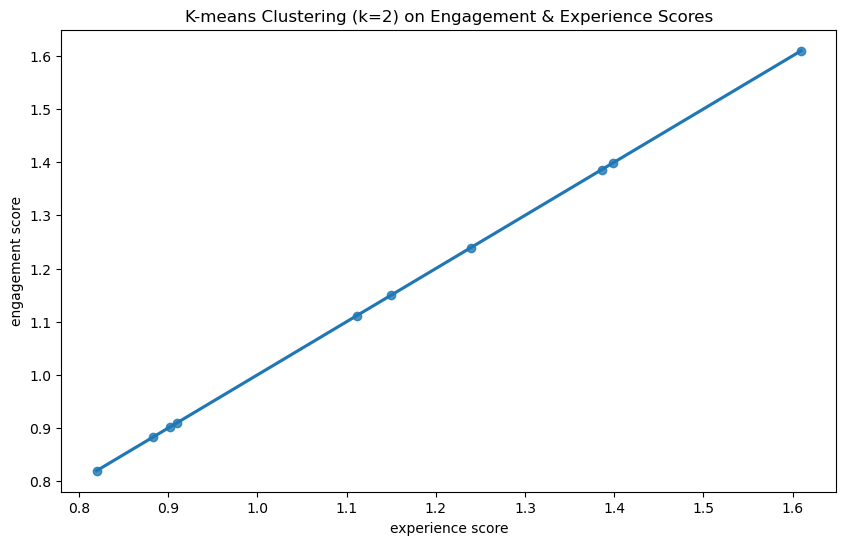

In [65]:
plt.figure(figsize=(10,6))
sns.regplot(data=data,y="engagement score",x="experience score").set(title='K-means Clustering (k=2) on Engagement & Experience Scores')
plt.show()

# Task 4.5 - Aggregate the average satisfaction & experience score per cluster.

In [66]:
df['clusters'] = kmeans.labels_
df['clusters'].value_counts()

0    6
1    4
Name: clusters, dtype: int64

In [67]:
result = df.groupby('clusters').mean()
result

,engagement score,experience score,cluster
clusters,,,
0,0.962630,0.962630,0.0
1,1.408573,1.408573,1.0


In [68]:
df.columns

Index(['engagement score', 'experience score', 'cluster', 'clusters'], dtype='object')

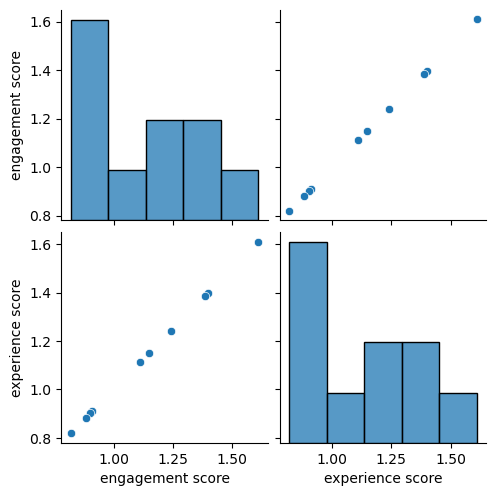

In [69]:
sns.pairplot(data=data,vars=['engagement score','experience score'])
plt.show()

In [70]:
data

,engagement score,experience score,satisfaction score
MSISDN/Number,,,
3.362578e+10,1.609635,1.609635,1.609635
3.361489e+10,1.398938,1.398938,1.398938
3.362632e+10,1.386219,1.386219,1.386219
3.376054e+10,1.239499,1.239499,1.239499
3.365973e+10,1.149652,1.149652,1.149652
3.367588e+10,1.111370,1.111370,1.111370
3.376041e+10,0.910247,0.910247,0.910247
3.366716e+10,0.902227,0.902227,0.902227
3.366646e+10,0.882624,0.882624,0.882624


In [71]:
df

,engagement score,experience score,cluster,clusters
MSISDN/Number,,,,
3.362578e+10,1.609635,1.609635,1,1
3.361489e+10,1.398938,1.398938,1,1
3.362632e+10,1.386219,1.386219,1,1
3.376054e+10,1.239499,1.239499,1,1
3.365973e+10,1.149652,1.149652,0,0
3.367588e+10,1.111370,1.111370,0,0
3.376041e+10,0.910247,0.910247,0,0
3.366716e+10,0.902227,0.902227,0,0
3.366646e+10,0.882624,0.882624,0,0
